In [1]:
# example_wind_generation.py
## import needed packages
from LESO import Wind, WindOffshore, System
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
## Set up the components and system
wind1 =           Wind('Onshore turbine')
wind2 =           WindOffshore('OSWF NW', lat=54, lon=5.58)
wind3 =           WindOffshore('BWZF2', lat=51.7, lon=3)

modelname = 'Trial to compare'
system = System(52, 5, model_name = modelname)
system.add_components([wind1, wind2, wind3])
system.fetch_input_data()
system.calculate_time_series()

loc, ye, unit = [], [], []
for component in system.components:
    loc.append(component.name)
    ye.append(component.state.power.sum()/component.installed)
    unit.append('kWh / ( year * kWp )')

tmmpdict = {
    'Location': loc,
    'Energy generated yearly': ye,
    'Unit': unit,
}

df = pd.DataFrame(tmmpdict)
df

API call matches last call, using stored data

Calculating time series for 3 components...


,Location,Energy generated yearly,Unit
0,Onshore turbine,3757.823834,kWh / ( year * kWp )
1,OSWF NW,4924.756409,kWh / ( year * kWp )
2,BWZF2,4597.827828,kWh / ( year * kWp )


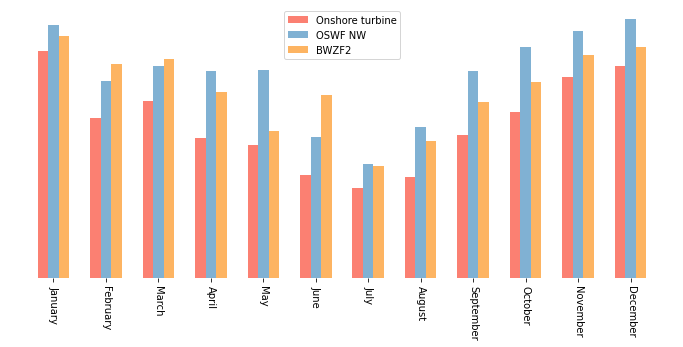

In [3]:
## plot yield over month
system.components[0].sum_by_month()

fig = plt.figure(figsize=(12,5))
i = 0.
r = np.arange(len(system.components[0].monthly_state.index))
barwidth = .2
colors = sns.color_palette('Set3', len(system.components)+3)

for i, component in enumerate(system.components):
    component.sum_by_month()
    plt.bar(
        r, 
        list(component.monthly_state.values.flatten()), 
        label = component.name,
        width=barwidth,
        alpha = 1,
        color = colors[i+3]
    )
    plt.legend()
    r = [x + barwidth for x in r]

plt.xticks([x - 2*barwidth for x in r], list(system.components[0].monthly_state.index), rotation = -90)
plt.tick_params(left=False, labelleft=False) #remove ticks
plt.box(False) #remove box